In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/"

'PROJECT OVERVIEW STATEMENT.gdoc'


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!curl https://sdk.cloud.google.com 

#!/bin/bash

URL=https://dl.google.com/dl/cloudsdk/channels/rapid/install_google_cloud_sdk.bash

function download {
  scratch="$(mktemp -d -t tmp.XXXXXXXXXX)" || exit
  script_file="$scratch/install_google_cloud_sdk.bash"

  echo "Downloading Google Cloud SDK install script: $URL"
  curl -# "$URL" > "$script_file" || exit
  chmod 775 "$script_file"

  echo "Running install script from: $script_file"
  "$script_file" "$@"
}

download "$@"


In [ ]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'
core:
  account: sz19036n@pace.edu

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

Choose the account you would like to use to perform operations for 
this configuration:
 [1] sz19036n@pace.edu
 [2] Log in with a new account
Please enter your numeric choice:  1

You are logged in as: [sz19036n@pace.edu].

Pick cloud project to use: 
 [1] boxwood-yen-307314


In [ ]:
!gsutil ls gs://688shuaizhang/

gs://688shuaizhang/netflix_titles.csv


In [ ]:
!gsutil cp gs://688shuaizhang/netflix_titles.csv .

Copying gs://688shuaizhang/netflix_titles.csv...
/ [1 files][  2.9 MiB/  2.9 MiB]                                                
Operation completed over 1 objects/2.9 MiB.                                      


Understand data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, plot, init_notebook_mode, iplot

import itertools
from collections import Counter
import json

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display # For widgets
from wordcloud import WordCloud # For wordcloud visualization


%matplotlib inline

In [ ]:
data = pd.read_csv("netflix_titles.csv")

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
data.shape

(7787, 12)

DATA CLEAN



In [ ]:
data.isna().sum()   

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
import missingno as msno

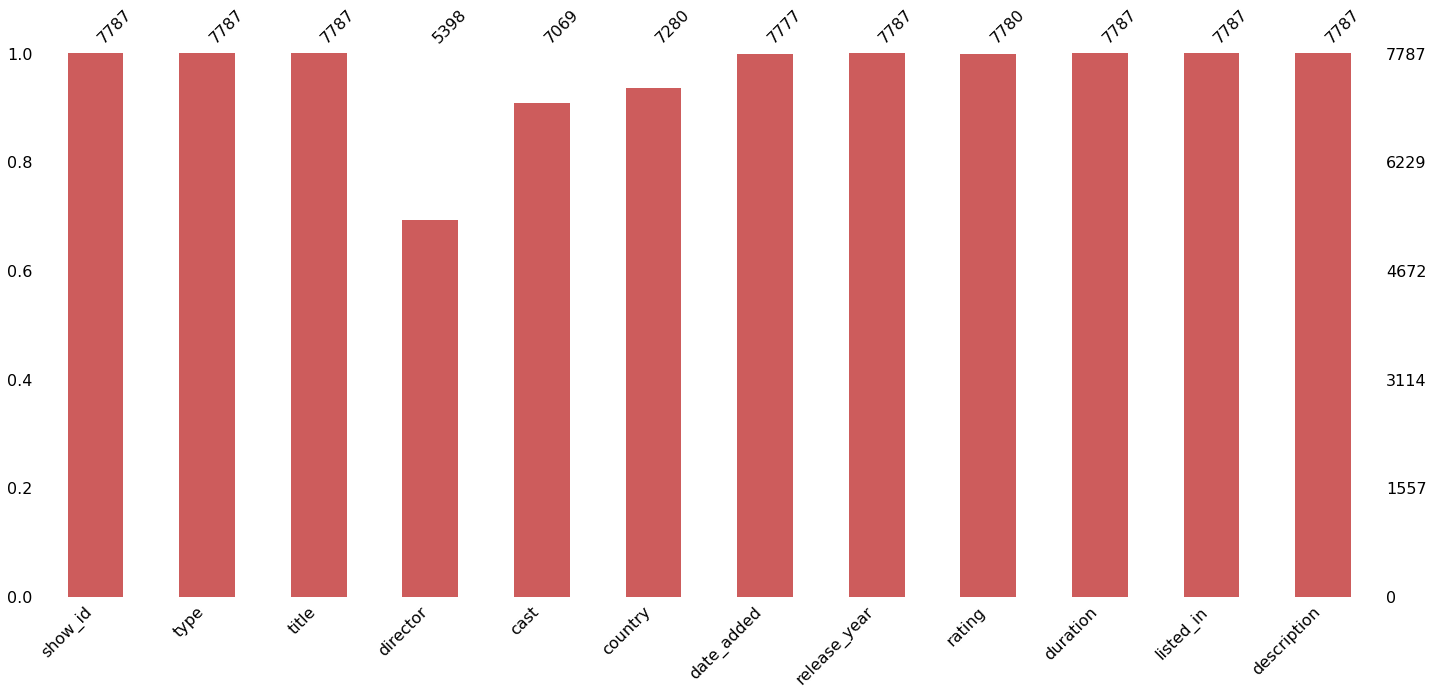

In [ ]:
msno.bar(data,color = 'indianred')
plt.show()

In [ ]:
df = data.copy()
df['cast'].fillna('unknown',inplace=True)
df['date_added'].fillna('unknown',inplace=True)
df['country'].fillna('unknown',inplace=True)
df['rating'].fillna('unknown',inplace=True)
df['director'].fillna('unknown',inplace=True)

In [ ]:
df.isna().sum()   

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df['date_added'] = df['date_added'].fillna('NaN Data')
df['year'] = df['date_added'].apply(lambda x: x[-4: len(x)])
df['month'] = df['date_added'].apply(lambda x: x.split(' ')[0])

display(df.sample(3))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
3434,s3435,Movie,Kolaiyuthir Kaalam,Chakri Toleti,"Nayanthara, Bhoomika Chawla, Prem Kathir, Rohi...",India,"April 24, 2020",2019,TV-14,107 min,"International Movies, Thrillers",The speech-and-hearing-impaired heiress of a p...,2020,April
4827,s4828,Movie,Perfect Bid: The Contestant Who Knew Too Much,C.J. Wallis,Theodore Slauson,Canada,"April 30, 2019",2017,TV-MA,72 min,Documentaries,"A ""Price Is Right"" superfan brings a bit of sc...",2019,April
2032,s2033,TV Show,Ethos,unknown,"Öykü Karayel, Fatih Artman, Funda Eryiğit, Def...",Turkey,"November 12, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Dramas",A group of individuals in Istanbul transcend s...,2020,November


DATA ANALYTIC

What's the content distribution like?

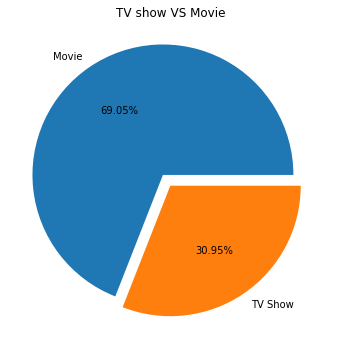

In [ ]:
df['type']=df['type'].astype('str').replace(['0','1'],['Movie','TV Show'])
plt.rcParams['figure.figsize']=6,6
plt.pie(df['type'].value_counts(),labels=df['type'].value_counts().index,autopct='%1.2f%%',explode=(0.1,0)) 
plt.title('TV show VS Movie')
plt.show()

<Figure size 576x432 with 0 Axes>

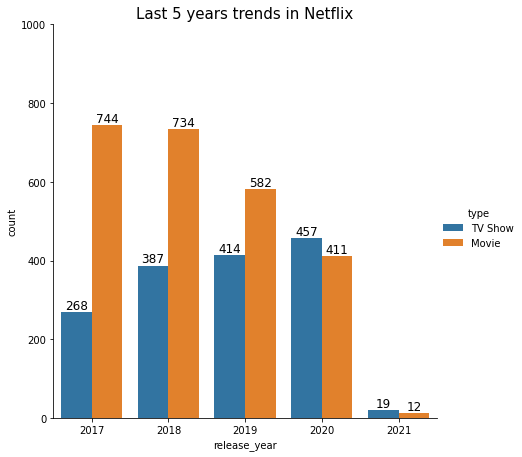

In [ ]:
plt.figure(figsize = (8,6))

import datetime
startYear = datetime.datetime.now().year - 5 + 1
lastFiveYears =  data[data.release_year >= startYear]

sns.catplot(data = lastFiveYears, kind = 'count',
    x = 'release_year', hue = 'type', height = 6)

ax = plt.gca()

# The maximum scale of y axis
ax.set_ylim([0, 1000])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize = 12, color = 'black', ha = 'center', va = 'bottom')

# The movies produced are decreasing while the TV shows produced are increasing in the last 5 years
plt.title('Last 5 years trends in Netflix', size = '15')
plt.show()

In [ ]:
TVshows = df[df['type'] == 'TV Show']
Movie = df[df['type'] == 'Movie']

In [ ]:
TVshows_progress = TVshows['release_year'].value_counts().sort_index()
Movie_progress = Movie['release_year'].value_counts().sort_index()

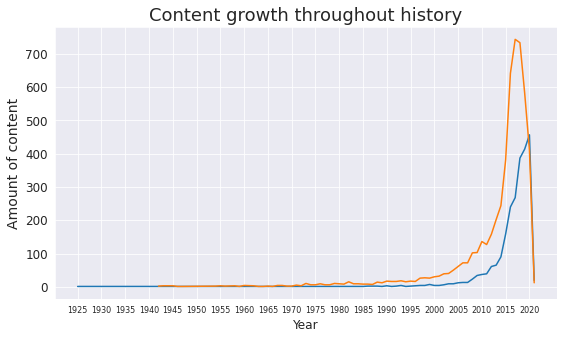

In [ ]:

plt.plot(TVshows_progress.index, TVshows_progress.values, label='TV shows')
plt.plot(Movie_progress.index, Movie_progress.values, label='Movie')

plt.xticks(list(range(1925, 2025, 5)), fontsize=8)
plt.title('Content growth throughout history', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount of content', fontsize=14)
plt.yticks(fontsize=12)
plt.fontsize = 20
plt.show()


(2000.0, 2025.0)

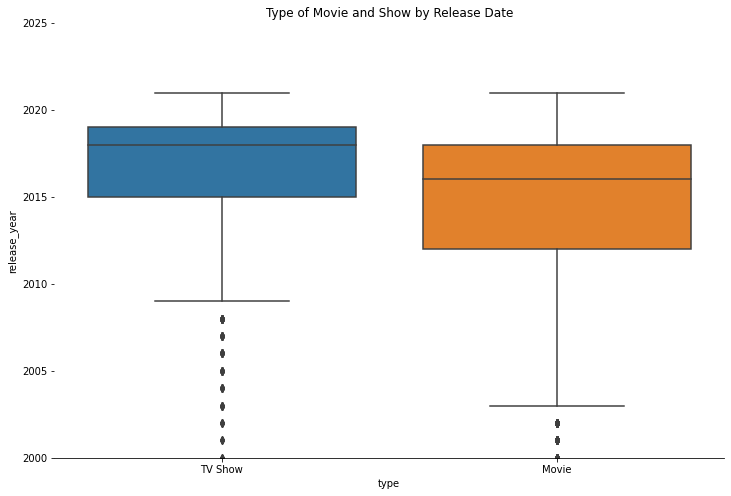

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='type', y='release_year', data=df, )
sns.despine(left=True)
plt.title('Type of Movie and Show by Release Date')
plt.ylim(2000,2025)

Movies and TV Shows Box plot with magnifying view. It sees tv shows have a more recent release_year. This means tv shows are releasing more in recent years.

Text(0.5, 1.0, 'Count of Movies by Duration')

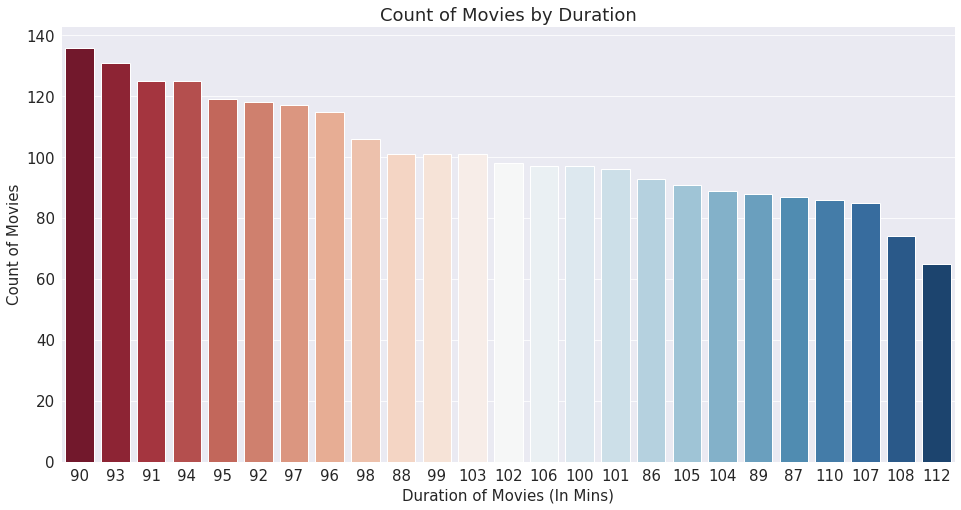

In [ ]:
df['duration'] = df['duration'].apply(lambda x: x.split(' ')).str[0]
df_tvshows = df[df['type'] == 'TV Show']
df_movie = df[df['type'] == 'Movie']
df_md = df_movie.groupby('duration').count().reset_index().sort_values(ascending=False,by='type')[0:25]
df_md
plt.figure(figsize=(16,8))
sns.barplot(data = df_md, x='duration', y='show_id', order=df_md['duration'], palette='RdBu')
sns.despine(left=True)
plt.ylabel('Count of Movies')
plt.xlabel('Duration of Movies (In Mins)')
plt.title('Count of Movies by Duration')

Text(0.5, 1.0, 'Count of Tv Shows by Number of Seasons')

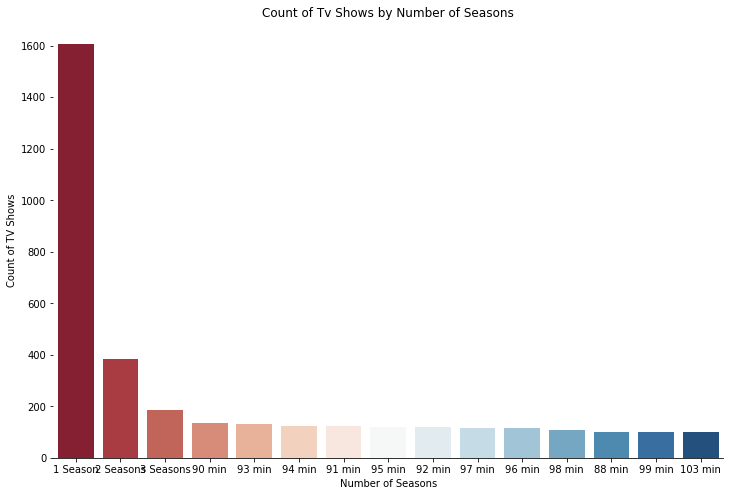

In [ ]:
df_td = df.groupby('duration').count().reset_index().sort_values(ascending=False,by='type')[0:15]
df_td
plt.figure(figsize=(12,8))
sns.barplot(data = df_td, x='duration', y='show_id', order=df_td['duration'], palette='RdBu')
sns.despine(left=True)
plt.ylabel('Count of TV Shows')
plt.xlabel('Number of Seasons')
plt.title('Count of Tv Shows by Number of Seasons')

In [ ]:
df_mr = df[df['type'] == 'Movie'].groupby('release_year').count().reset_index().sort_values(ascending=False, by='type')
df_tr = df[df['type'] == 'TV Show'].groupby('release_year').count().reset_index().sort_values(ascending=False, by='type')

Text(0.5, 1.0, 'For TV Shows')

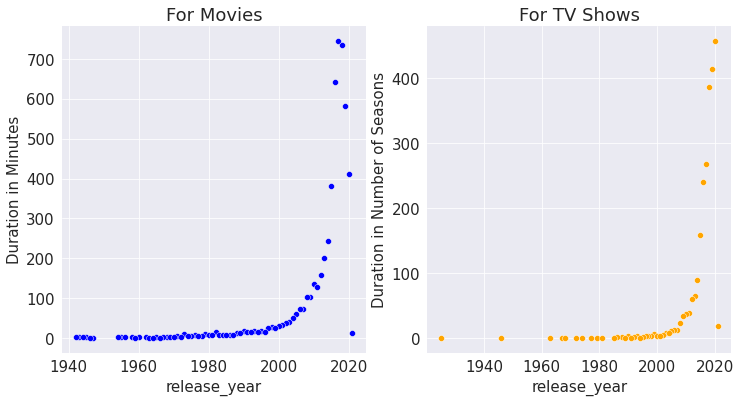

In [ ]:
fig, ax =plt.subplots(nrows= 1, ncols = 2, figsize=(12,6))
#mlb.figure(figsize=(8,6))
g = sns.scatterplot(x='release_year', y='duration', data=df_mr, ax=ax[0], color= 'blue')
s = sns.scatterplot(x='release_year', y='duration', data=df_tr, ax=ax[1], color='orange')
sns.despine(left=True)

g.set_ylabel('Duration in Minutes')
s.set_ylabel('Duration in Number of Seasons')

g.set_title('For Movies')
s.set_title('For TV Shows')

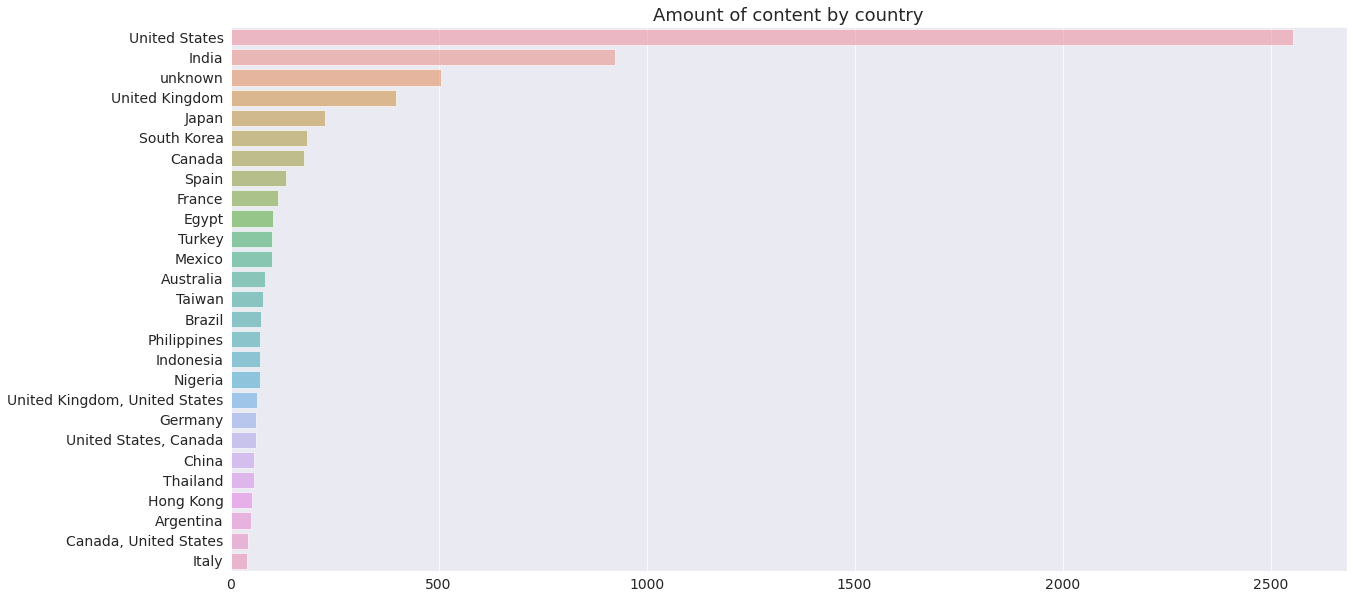

In [ ]:
countries = df['country'].value_counts()[df['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

plt.figure(figsize=(20,10))
plt.title('Amount of content by country', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '00000000'


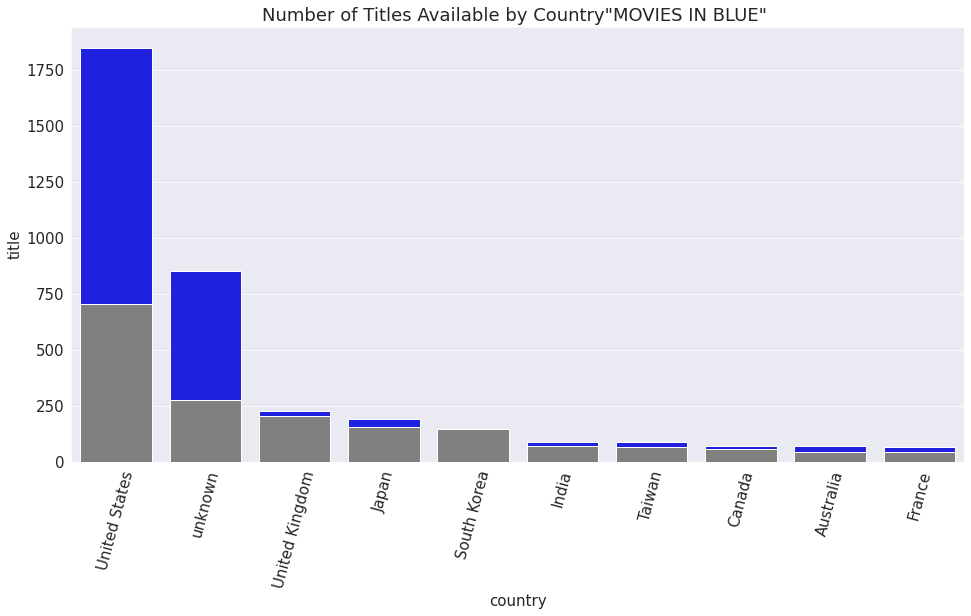

In [ ]:
xplt = df[df["type"] == "Movie"].groupby('country').count().sort_values('title', ascending=False).reset_index().country.head(10)
yplt = df[df["type"] == "Movie"].groupby('country').count().sort_values('title', ascending=False).reset_index().title.head(10)

xplt2 = df[df["type"] == "TV Show"].groupby('country').count().sort_values('title', ascending=False).reset_index().country.head(10)
yplt2 = df[df["type"] == "TV Show"].groupby('country').count().sort_values('title', ascending=False).reset_index().title.head(10)

plt.figure(figsize=(16, 8))
plt.fontsize = 20
plt.xticks(rotation=75)
plt.title(label='Number of Titles Available by Country"MOVIES IN BLUE" ')
plt.xlabel("Country")
plt.ylabel("Number of Titles")
sns.barplot(x=xplt, y=yplt, color="BLUE");
sns.barplot(x=xplt2, y=yplt2, color="GRAY");


In [ ]:
US = df[df['country'] == 'United States']
US.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...


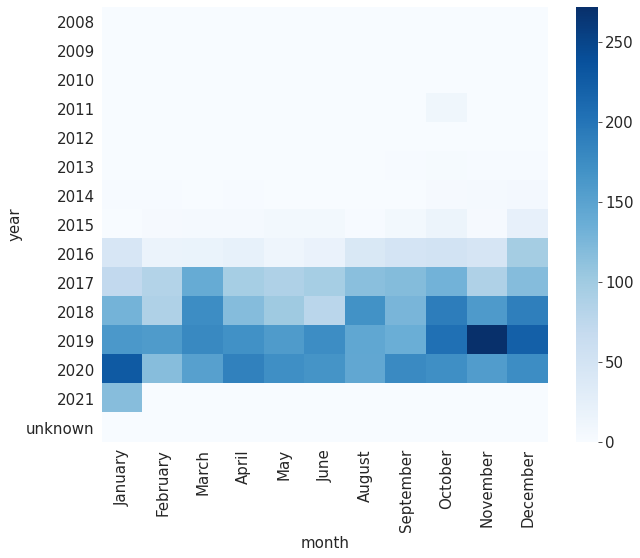

In [ ]:
releases = df[['date_added']].dropna()
releases['year'] = releases['date_added'].apply(lambda date: date.split(', ')[-1])
releases['month'] = releases['date_added'].apply(lambda date: date.strip().split(' ')[0])
column_order = ['January', 'February', 'March', 'April', 'May', 'June', 'August', 'September', 'October', 'November', 'December']

df_releases = releases.groupby('year')['month'].value_counts().unstack().fillna(0)[column_order]

plt.figure(figsize=(10,8))
ax = sns.heatmap(df_releases, cmap = 'Blues')

In [ ]:
df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

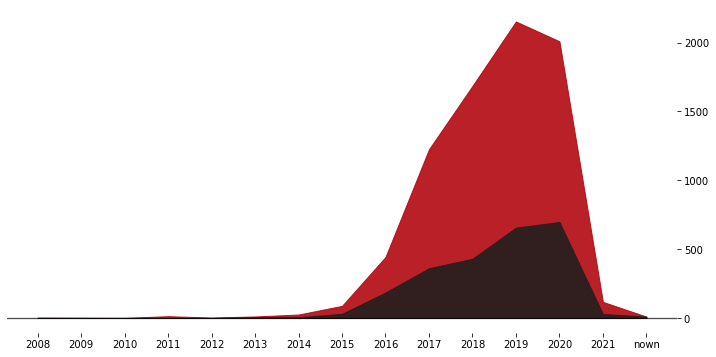

In [ ]:
data_sub = df.groupby('type')['year'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'BLACK', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)





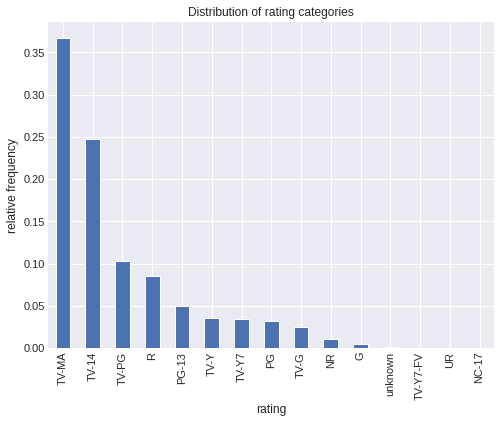

In [ ]:
plt.figure(figsize=(8,6))
df['rating'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of rating categories')
plt.xlabel('rating')
plt.ylabel('relative frequency')
plt.show()

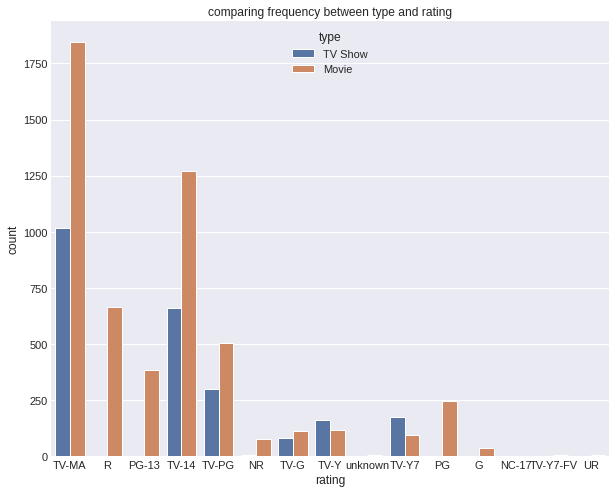

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('comparing frequency between type and rating')
plt.show()

In [ ]:
import plotly.express as px
df_country_year = df.groupby(by=['country','type','rating']).count().reset_index()
df_country_year['total']=df_country_year.groupby(by=['country'])['title'].cumsum()

px.choropleth(df_country_year.sort_values(by='rating'), locations='country', title='Country wise statistics of Ratings',color='total', locationmode='country names', animation_frame='rating', range_color=[0,1000],
             )

In [ ]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

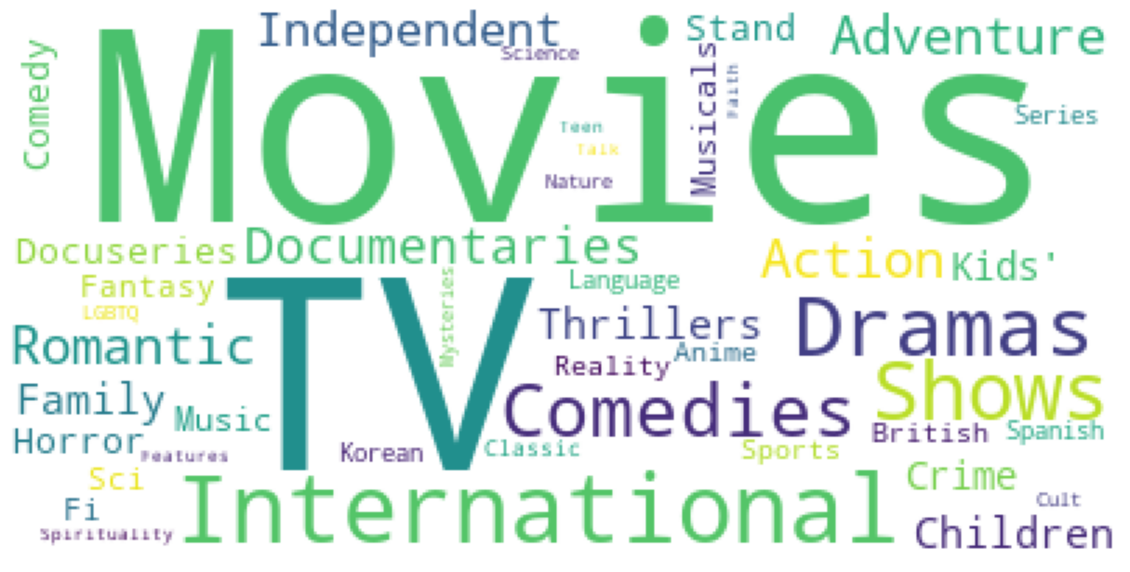

In [ ]:
plt.figure(figsize=(20,20))
categories=df['listed_in'].values
wc_cats=WordCloud(max_words=50,background_color='white',collocations=False).generate(str(' '.join(categories)))
plt.imshow(wc_cats)
plt.axis("off")
plt.show()

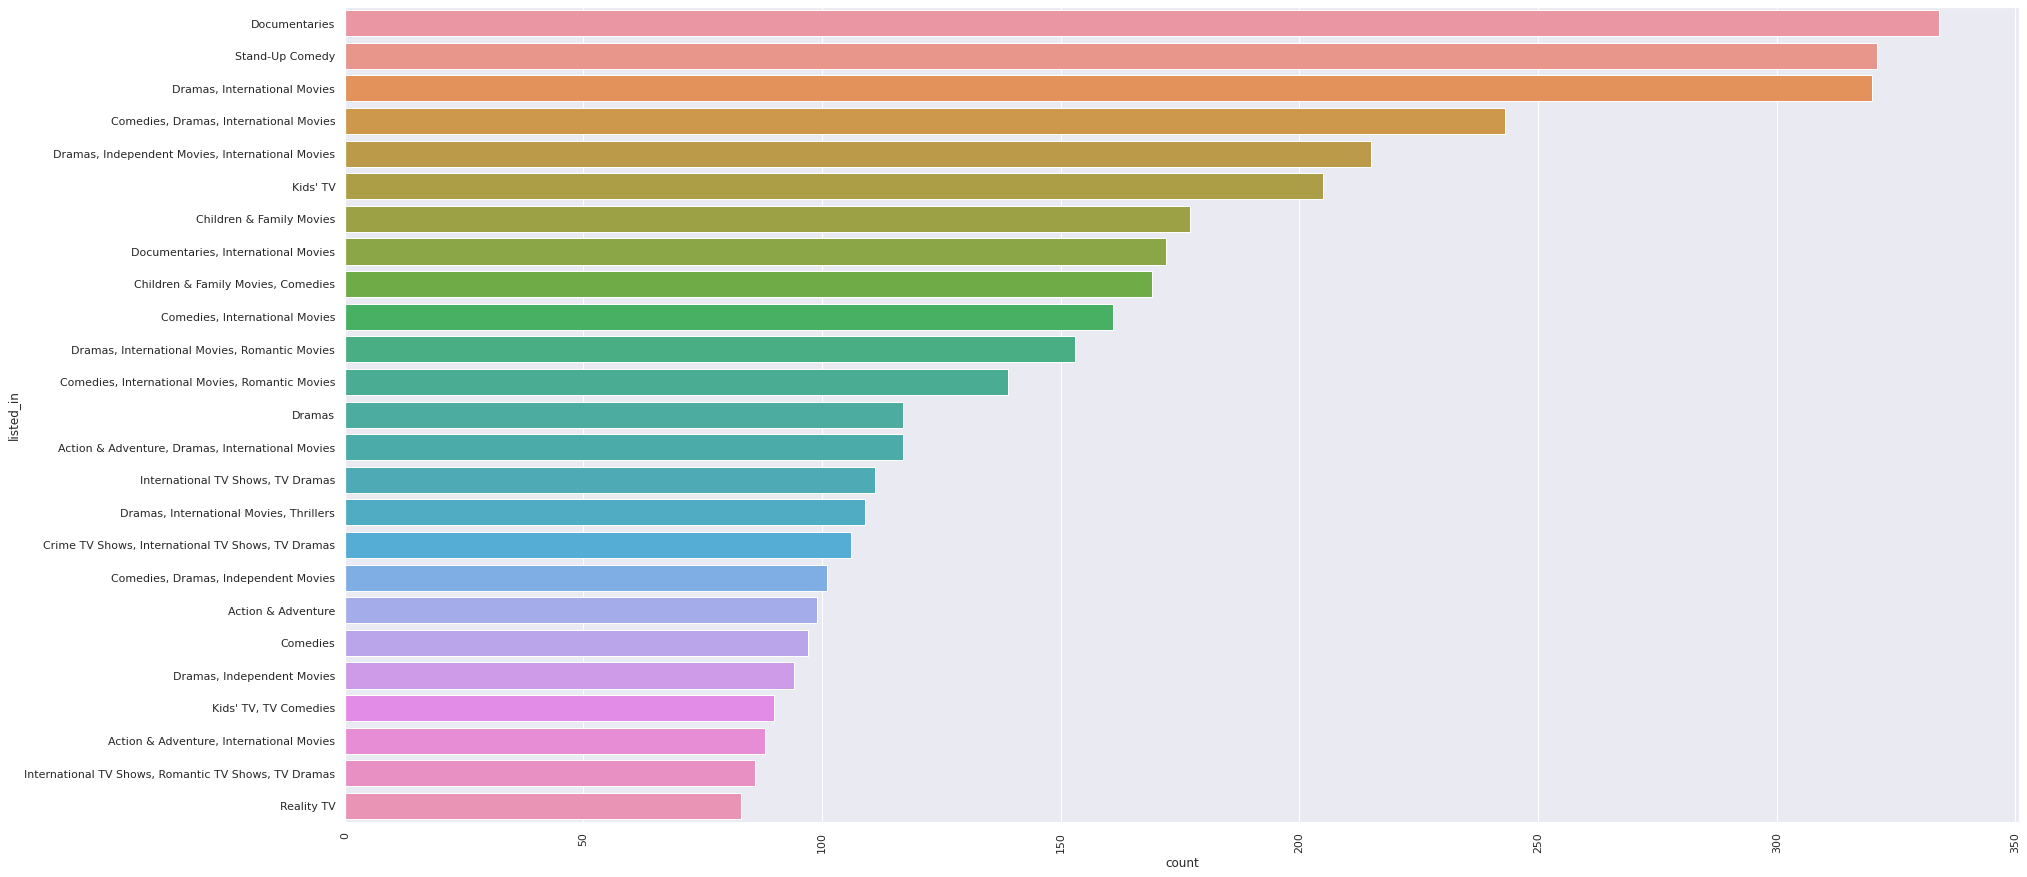

In [ ]:
sns.set()
plt.figure(figsize=(30,15))
sns.countplot(y='listed_in',data = df,order =df["listed_in"].value_counts().index[0:25])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
print("Number of unique directors on Netflix:", 
      len(df.director.unique()))
print("Number of directors that directed more than 1 media content:", 
      sum(df.director.value_counts() > 1))
print("Average of media content count by director:", 
      round(df.director.value_counts().mean(),2))
print("Median of media content count by director:", 
      round(df.director.value_counts().median(),2))
print("Percentage of directors on Netflix directed more than 1 media content:", 
      round(100*737/4050, 2), "%")

Number of unique directors on Netflix: 4050
Number of directors that directed more than 1 media content: 738
Average of media content count by director: 1.92
Median of media content count by director: 1.0
Percentage of directors on Netflix directed more than 1 media content: 18.2 %


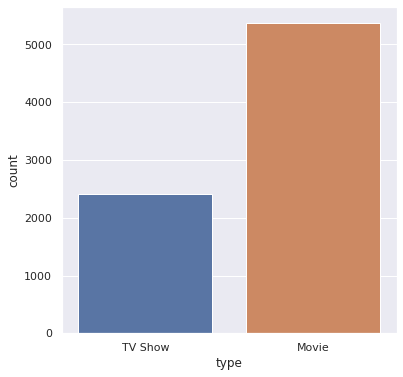

In [ ]:
sns.countplot(data=df, x='type')

In [ ]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  ['G', 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']

In [ ]:
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)

In [ ]:
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

In [ ]:
rating_barplot(movie_rating,'Movie', 1200)
rating_barplot(tv_rating,'TV Show' , 700, 800)